In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline
data = pd.read_csv(r'C:/Users/js103/Desktop/SHAP 공부/data/heart.csv')

data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Test accuracy:", model.score(X_test, y_test))

Train shape: (242, 13) Test shape: (61, 13)
Test accuracy: 0.8360655737704918


In [2]:
data.dtypes

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
resting_electrocardiogram      int64
max_heart_rate_achieved        int64
exercise_induced_angina        int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
target                         int64
dtype: object

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# 모델의 최종 예측 레이블 (0 또는 1)
# 확률(proba)이 아닌, 0.5를 기준으로 나눈 최종 클래스를 얻습니다.
y_pred = model.predict(X_test)

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)


--- Confusion Matrix ---
[[24  5]
 [ 5 27]]


C:\Users\js103\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\js103\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\js103\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\js103\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


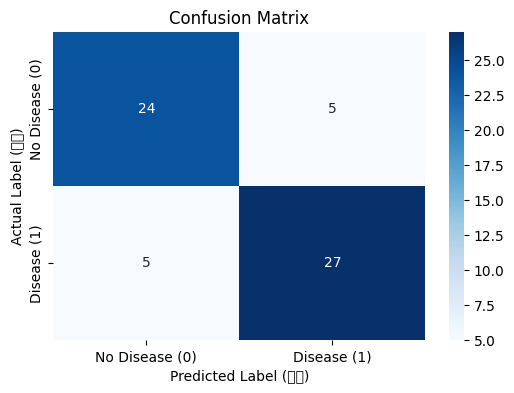

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

print("\n--- Confusion Matrix ---")
print(conf_matrix)

# 시각화를 위한 코드 (선택 사항)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease (0)', 'Disease (1)'], 
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.ylabel('Actual Label (실제)')
plt.xlabel('Predicted Label (예측)')
plt.title('Confusion Matrix')
plt.show()

In [5]:
print("\n--- Classification Report (분류 보고서) ---")
print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Disease (1)']))


--- Classification Report (분류 보고서) ---
                precision    recall  f1-score   support

No Disease (0)       0.83      0.83      0.83        29
   Disease (1)       0.84      0.84      0.84        32

      accuracy                           0.84        61
     macro avg       0.84      0.84      0.84        61
  weighted avg       0.84      0.84      0.84        61



In [6]:
# 1. X_train과 X_test의 원본 인덱스 가져오기
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

# 2. 결과 출력
print("--- X_train original index ---")
# 훈련 세트가 242개로 많으므로, 처음 10개와 마지막 10개만 출력합니다.
print(f"총 개수: {len(train_indices)}개")
print(f"처음 10개: {train_indices[:10]}")
print(f"마지막 10개: {train_indices[-10:]}")

print("\n--- X_test original index  ---")
# 테스트 세트는 61개이므로 모두 출력합니다.
print(f"총 개수: {len(test_indices)}개")
print(test_indices)

# 3. 추가 확인: 원본 데이터셋 크기
print(f"\nOriginal data set's number of indexes: {len(X.index)}")
print(f"Train + Test index: {len(train_indices) + len(test_indices)}개")

--- X_train original index ---
총 개수: 242개
처음 10개: [132, 202, 196, 75, 176, 59, 93, 6, 177, 30]
마지막 10개: [87, 214, 121, 302, 20, 188, 71, 106, 270, 102]

--- X_test original index  ---
총 개수: 61개
[179, 228, 111, 246, 60, 9, 119, 223, 268, 33, 5, 101, 45, 175, 118, 46, 125, 192, 285, 279, 152, 269, 272, 25, 146, 283, 254, 73, 231, 109, 139, 284, 198, 42, 17, 168, 76, 90, 24, 57, 92, 77, 137, 116, 7, 251, 281, 78, 292, 232, 219, 255, 63, 82, 236, 204, 249, 104, 300, 193, 184]

Original data set's number of indexes: 303
Train + Test index: 303개


In [7]:
import shap

# Jupyter/Colab에서 인터랙티브 force plot 보려면
shap.initjs()

# TreeExplainer 생성 (RandomForest 같은 tree 모델에 최적)
explainer = shap.TreeExplainer(model)

c:\Users\js103\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# 오래된/새로운 shap 버전 차이 존재: 안전한 방법으로 explainer.shap_values 사용
# binary classification일 경우 shap_values는 보통 [class0_array, class1_array] 형태로 반환됩니다.
shap_values = explainer.shap_values(X_test)

# 출력 형태 확인 (디버그용)
print(type(shap_values))
# 예: list 이면 shap_values[1].shape -> (n_samples, n_features)
if isinstance(shap_values, list):
    print("shap_values for class 0 shape:", shap_values[0].shape)
    print("shap_values for class 1 shape:", shap_values[1].shape)
else:
    # 최신 shap 버전: explainer(X)로 Explanation 객체를 반환할 수 있음.
    print("explainer returned Explanation object with shape info:", shap_values.shape)

<class 'numpy.ndarray'>
explainer returned Explanation object with shape info: (61, 13, 2)



--- SHAP Summary Plot ---


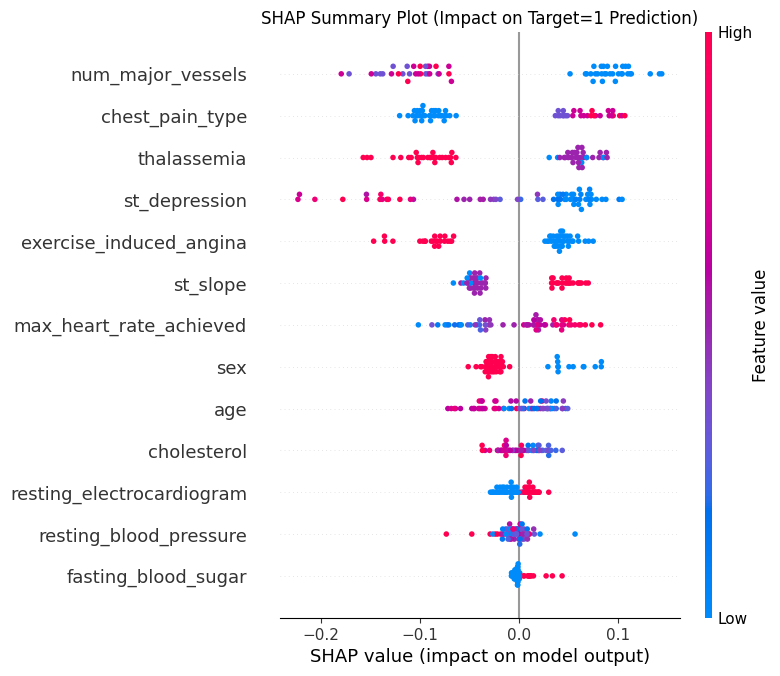

In [9]:
# 3차원 배열에서 Class 1 (인덱스 1)의 SHAP 값만 선택
# shap_values[:, :, 1]의 모양은 (61, 13)이 됩니다.
shap_values_class1 = shap_values[:, :, 1] 

# ---------------------------------------------
# SHAP Summary Plot 생성
print("\n--- SHAP Summary Plot ---")
# shap_values_class1와 X_test는 모두 (61, 13) 모양이므로 일치합니다.
shap.summary_plot(shap_values_class1, X_test, show=False)
plt.title("SHAP Summary Plot (Impact on Target=1 Prediction)")
plt.show()

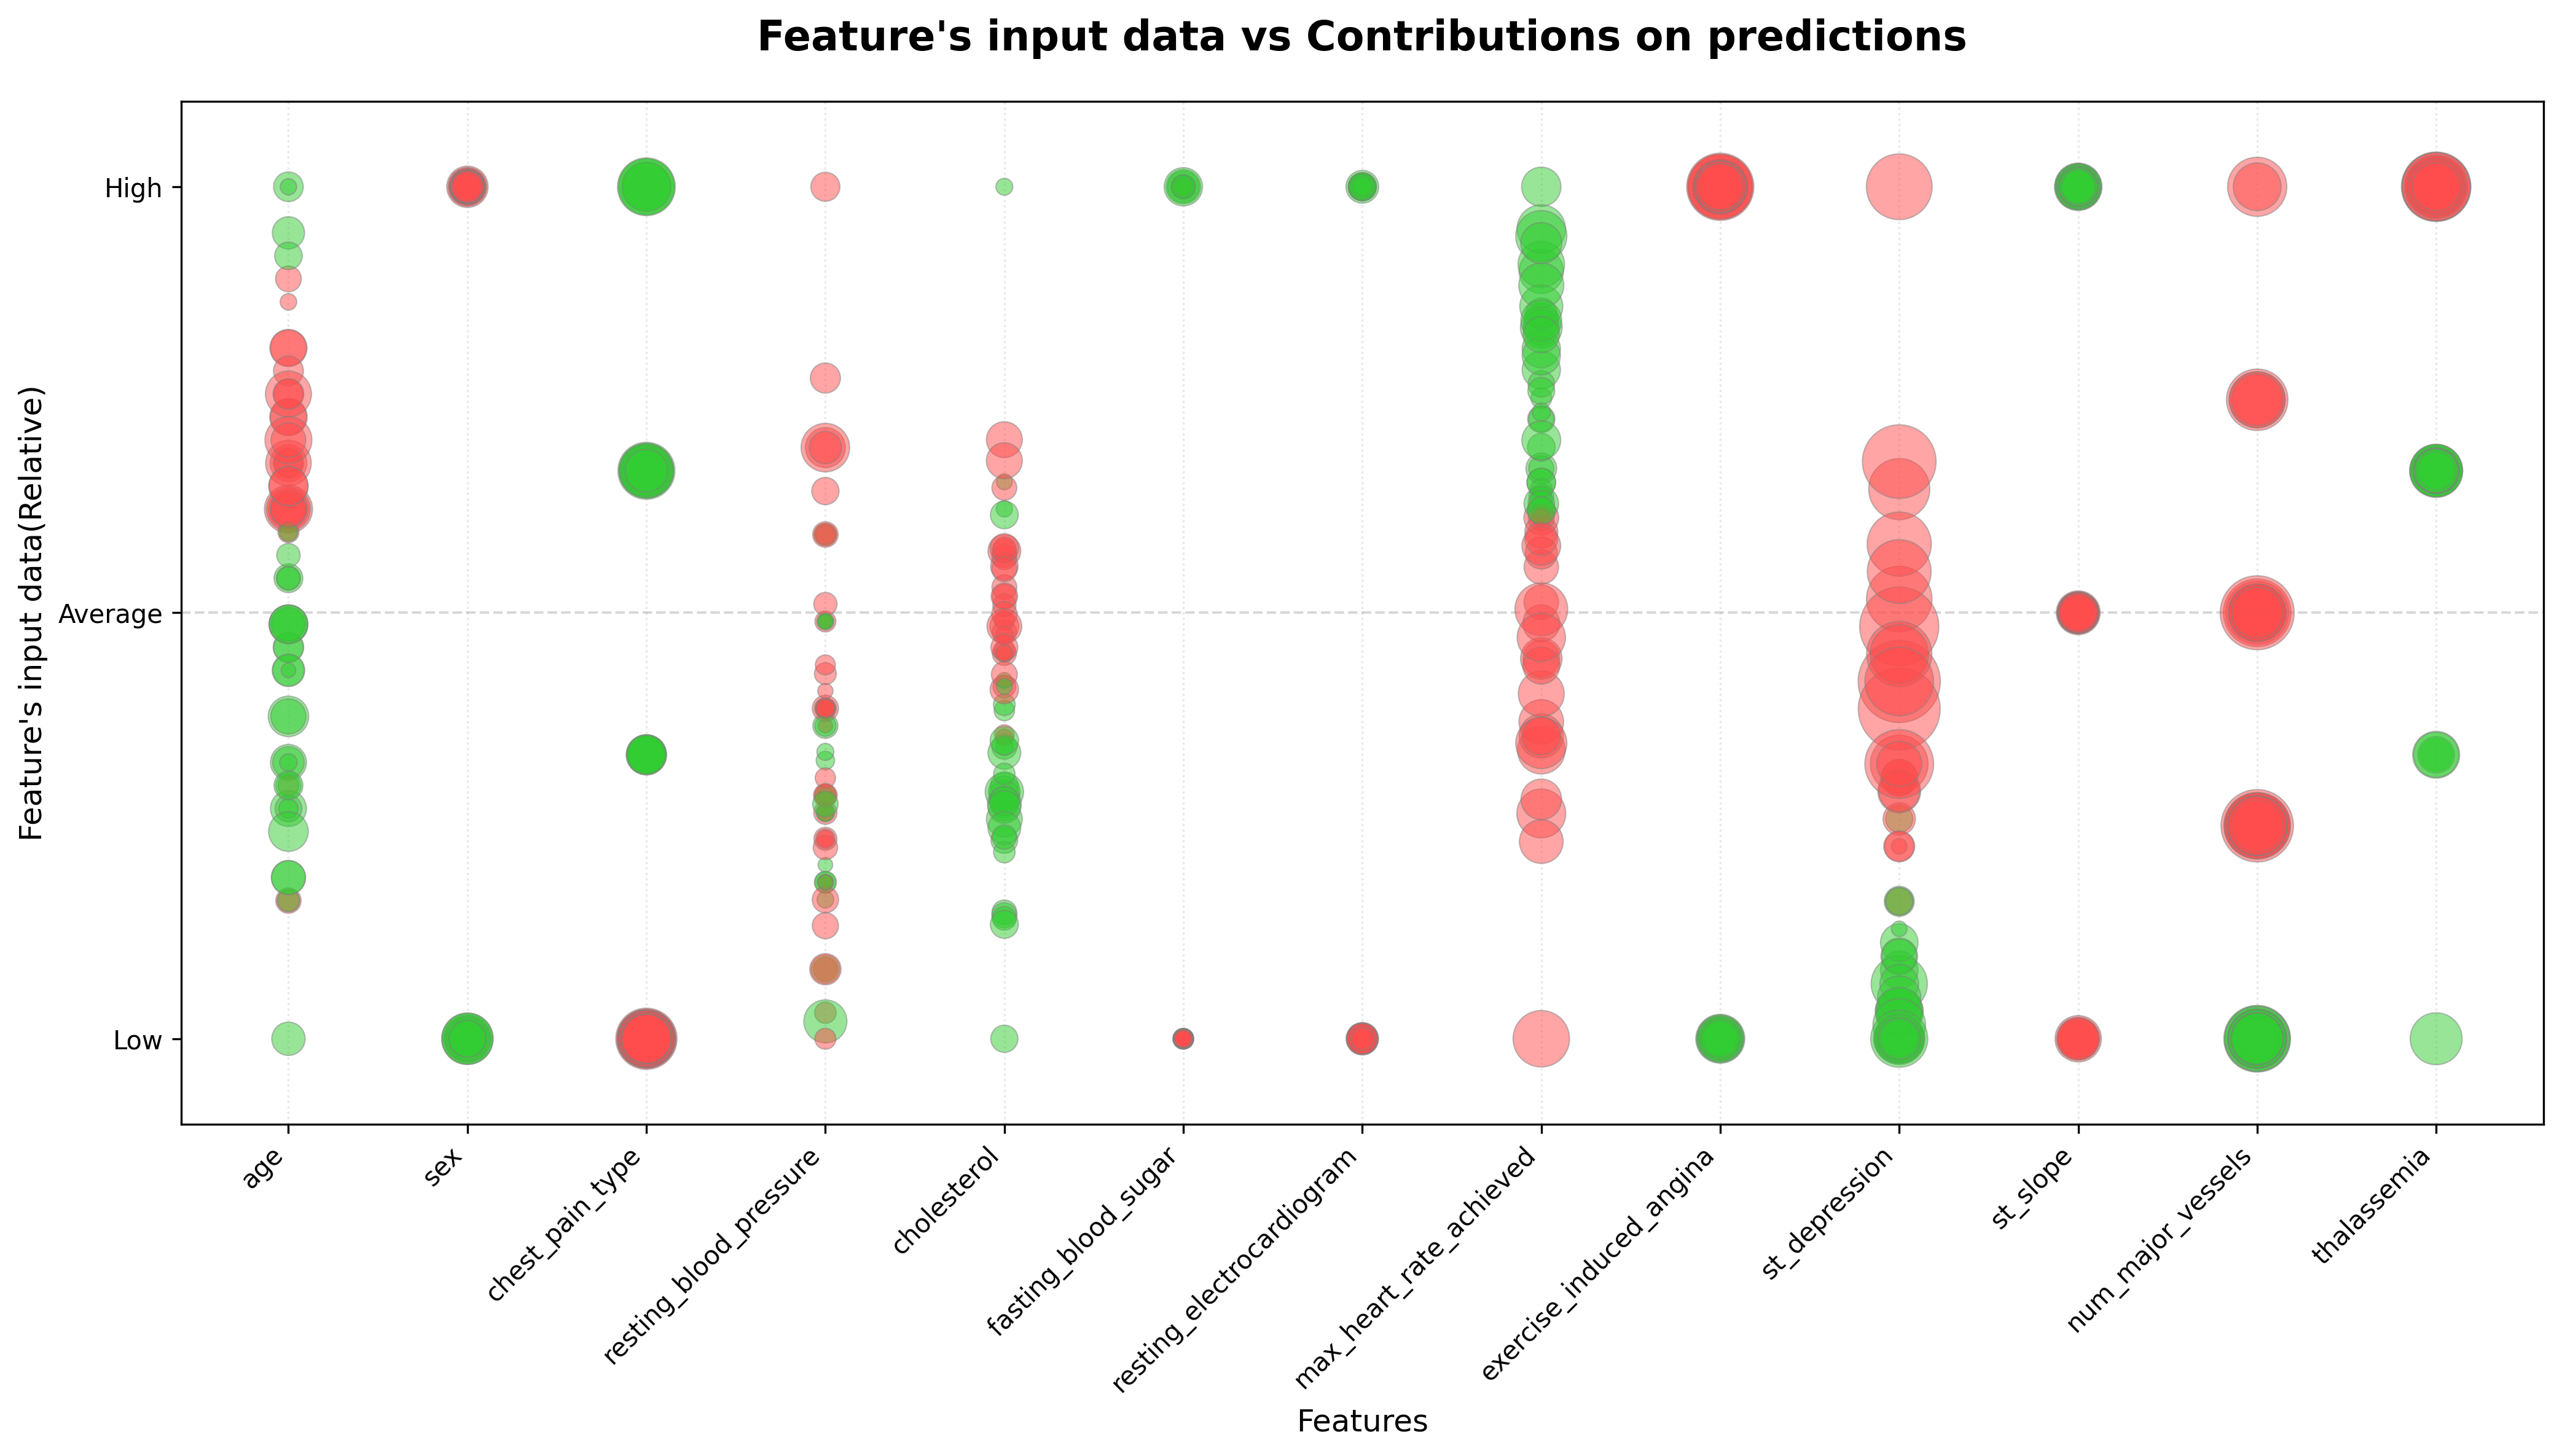

In [11]:


# --------------------------
# 데이터 전처리 (정규화)
# --------------------------
X_norm = X_test.copy()
for col in X_norm.columns:
    min_val = X_test[col].min()
    max_val = X_test[col].max()
    if max_val - min_val == 0:
        X_norm[col] = 0.5
    else:
        X_norm[col] = (X_test[col] - min_val) / (max_val - min_val)

# --------------------------
# 1. 플롯 설정
# --------------------------
plt.figure(figsize=(14, 8), dpi=300)
ax = plt.gca()

# 중앙선 (중간값)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3, linewidth=1)

feature_names = X_test.columns
num_features = len(feature_names)

# SHAP 값 절댓값 최대치 (점 크기 비례용)
max_abs_shap = np.abs(shap_values_class1).max()

# --------------------------
# 2. 각 feature별 산점도
# --------------------------
for i, feature in enumerate(feature_names):
    y_values = X_norm[feature]  # 0~1 normalized
    
    shap_vals = shap_values_class1[:, i]
    
    # 점 색상: 양수 초록, 음수 빨강
    colors = ['#32cd32' if val >=0 else '#ff4d4d' for val in shap_vals]
    
    # 점 크기: shap 절댓값 비례 (조정 가능)
    sizes = 30 + (np.abs(shap_vals) / max_abs_shap) * 1000  # 최소 50, 최대 250
    
    # 산점도
    #x_jitter = np.random.normal(loc=i, scale=0.08, size=len(y_values))
    ax.scatter(
        np.full_like(y_values, i),  # jitter 없이 일렬
        #x_jitter,
        y_values,
        c=colors,
        s=sizes,
        edgecolor='gray',
        linewidth=0.5,
        alpha=0.5,
        zorder=2
    )

# --------------------------
# 3. 축 및 레이블
# --------------------------
plt.title("Feature's input data vs Contributions on predictions", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature's input data(Relative)", fontsize=12)

plt.xticks(ticks=range(num_features), labels=feature_names, rotation=45, ha='right', fontsize=10)
plt.yticks([0, 0.5, 1], ["Low", "Average", "High"])
plt.ylim(-0.1, 1.1)

plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()


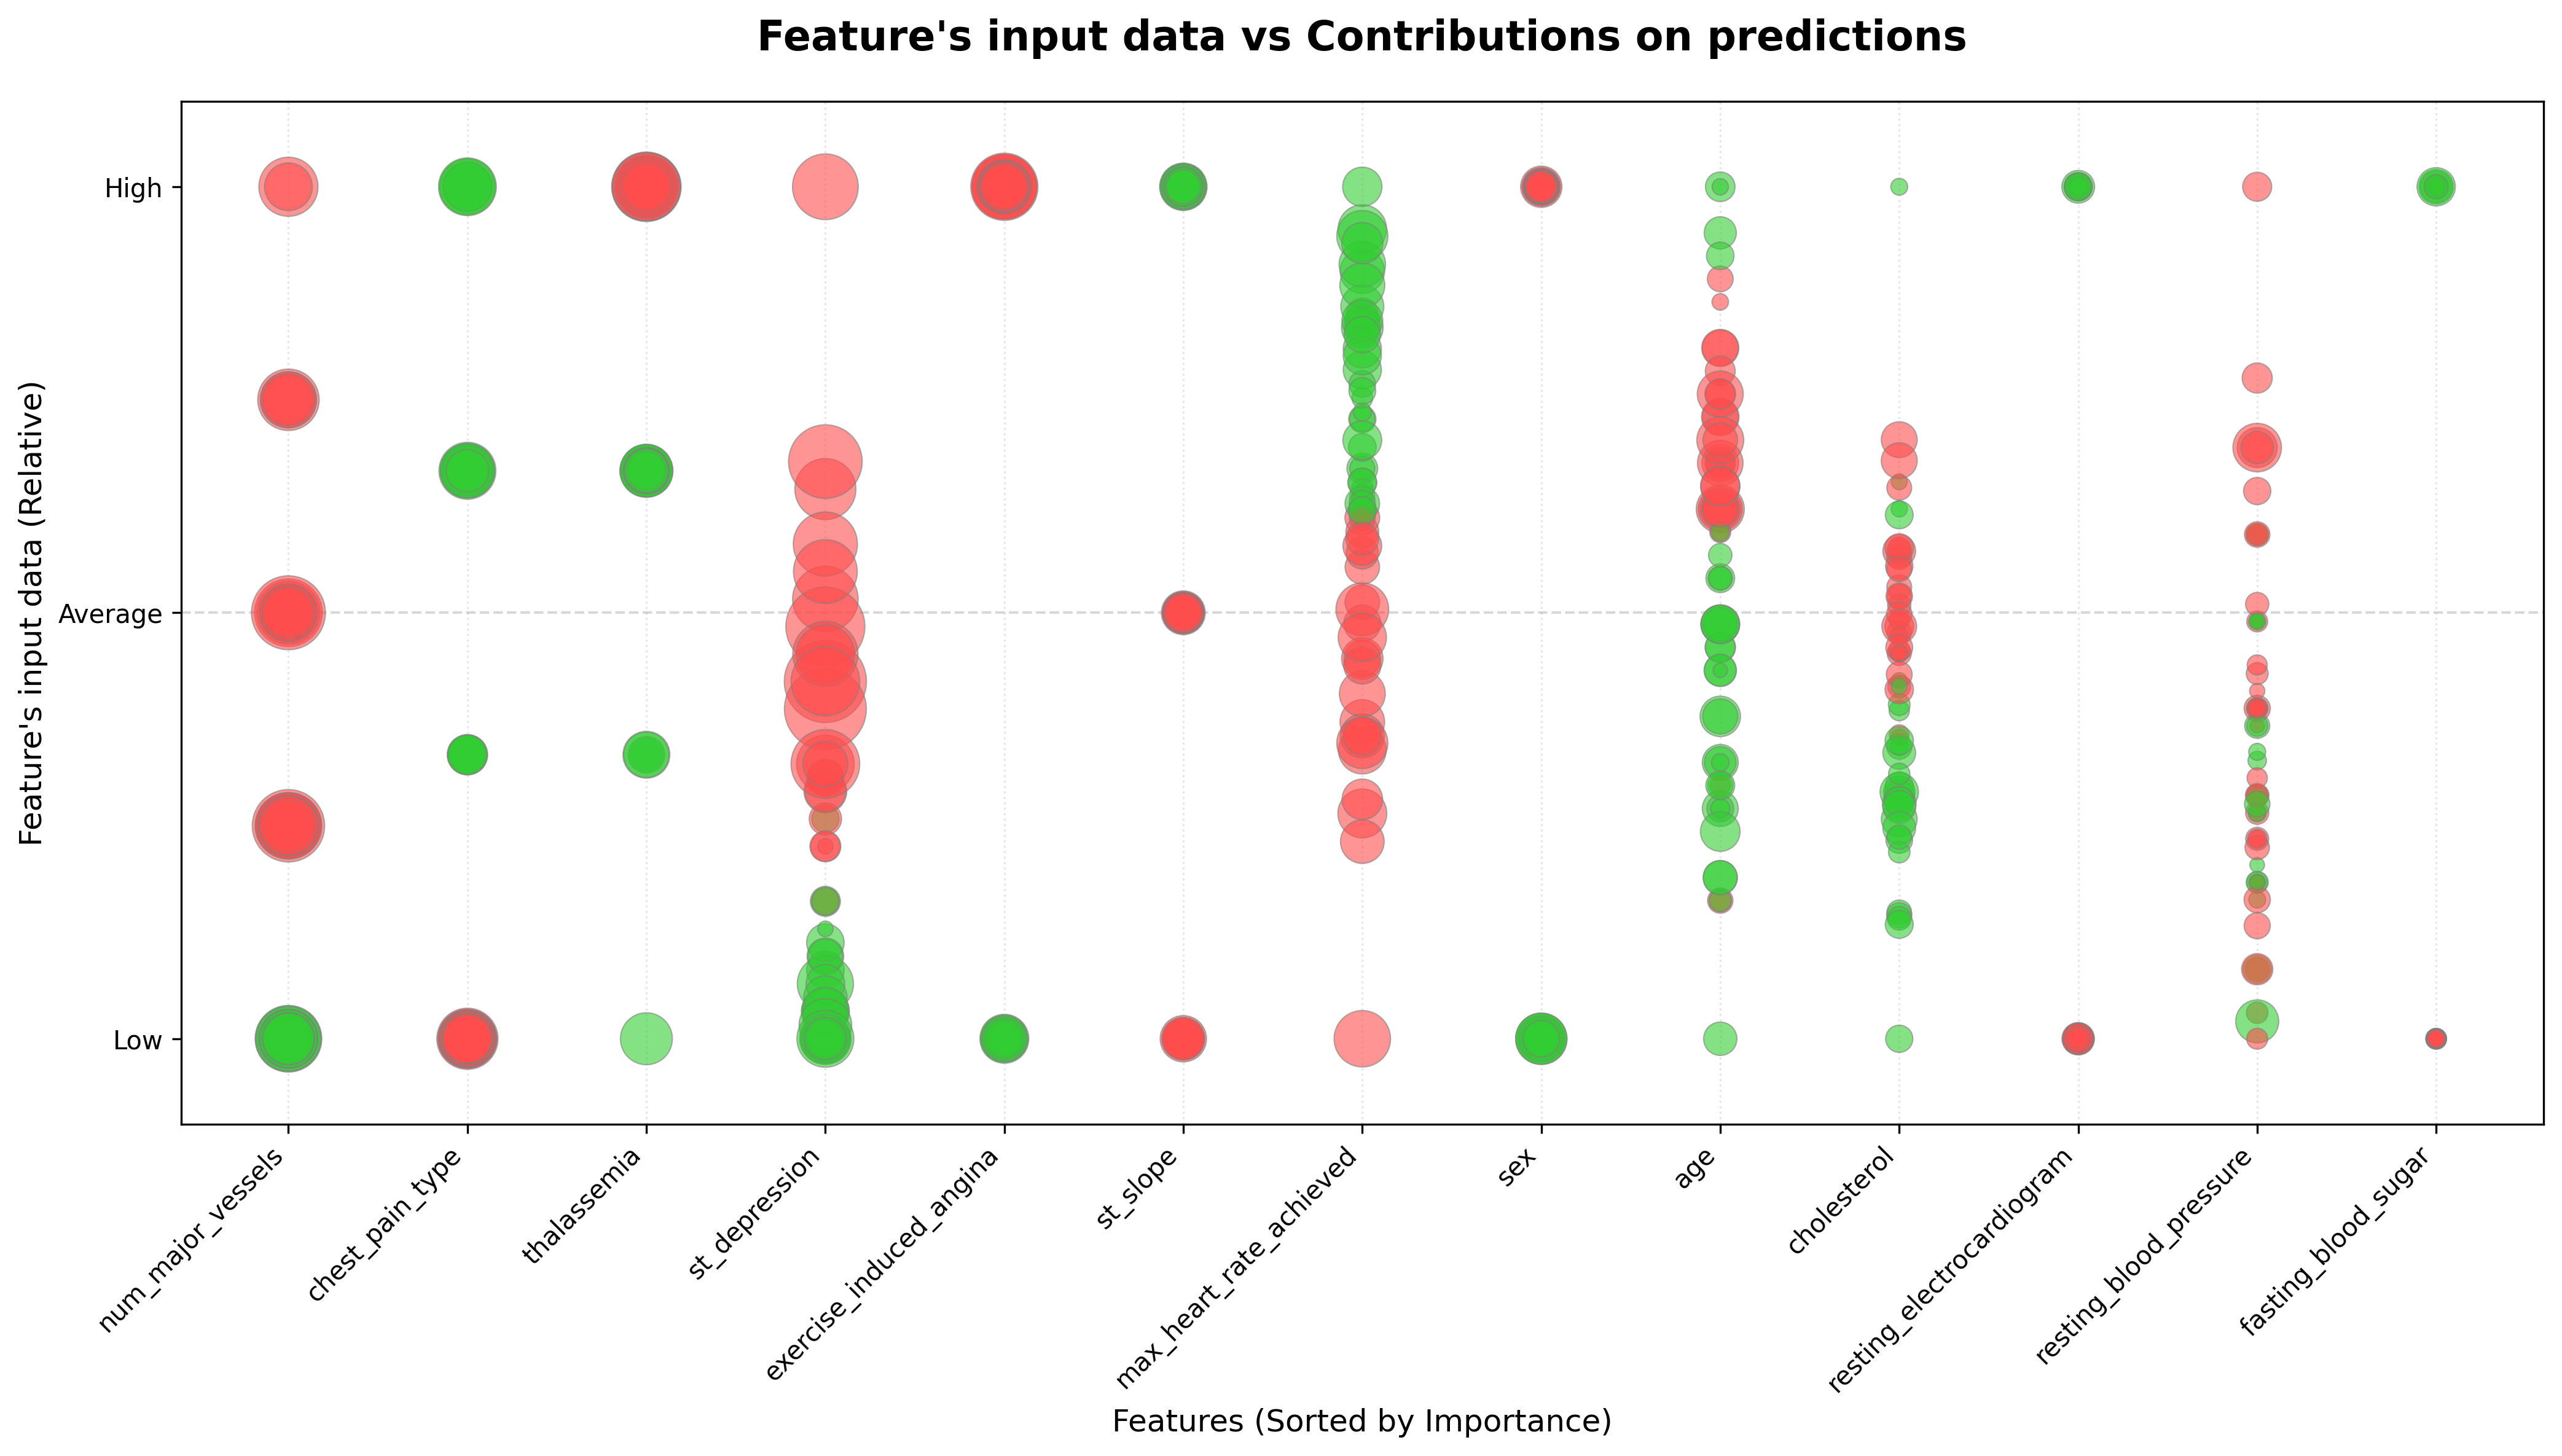

In [12]:


# --------------------------
# 데이터 전처리 (정규화)
# --------------------------
# X_test가 DataFrame이라고 가정합니다.
X_norm = X_test.copy()
for col in X_norm.columns:
    min_val = X_test[col].min()
    max_val = X_test[col].max()
    if max_val - min_val == 0:
        X_norm[col] = 0.5
    else:
        X_norm[col] = (X_test[col] - min_val) / (max_val - min_val)

# --------------------------
# [NEW] 중요도 기준 정렬 로직
# --------------------------
# 1. 각 특징별 SHAP 값의 절댓값 평균 계산 (이게 SHAP Feature Importance입니다)
mean_abs_shap = np.abs(shap_values_class1).mean(axis=0)

# 2. 중요도가 높은 순서대로 인덱스 정렬 (내림차순)
sorted_indices = np.argsort(mean_abs_shap)[::-1]

# 3. 데이터와 이름을 정렬된 순서로 재배치
sorted_feature_names = X_test.columns[sorted_indices]
sorted_shap_values = shap_values_class1[:, sorted_indices]
sorted_X_norm = X_norm.iloc[:, sorted_indices]

# --------------------------
# 1. 플롯 설정
# --------------------------
plt.figure(figsize=(14, 8), dpi=300)
ax = plt.gca()

# 중앙선 (중간값)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3, linewidth=1)

num_features = len(sorted_feature_names)

# SHAP 값 절댓값 최대치 (점 크기 비례용) - 전체 데이터 기준
max_abs_shap = np.abs(sorted_shap_values).max()

# --------------------------
# 2. 각 feature별 산점도 (정렬된 데이터 사용)
# --------------------------
# enumerate안에 sorted_feature_names를 넣어서 중요도 순서대로 그립니다.
for i, feature in enumerate(sorted_feature_names):
    
    # 정렬된 X_norm에서 해당 특징의 값 가져오기
    y_values = sorted_X_norm[feature]  # 0~1 normalized
    
    # 정렬된 SHAP 값 가져오기 (이미 위에서 순서를 맞췄으므로 i를 그대로 사용)
    shap_vals = sorted_shap_values[:, i]
    
    # 점 색상: 양수(긍정적 영향)는 초록, 음수(부정적 영향)는 빨강
    colors = ['#32cd32' if val >=0 else '#ff4d4d' for val in shap_vals]
    
    # 점 크기: shap 절댓값 비례
    # 점이 너무 작으면 안보이므로 기본 크기(30)에 가중치를 더함
    sizes = 30 + (np.abs(shap_vals) / max_abs_shap) * 1000 
    
    # 산점도 그리기
    # x 좌표는 i (정렬된 순서)
    ax.scatter(
        np.full_like(y_values, i), 
        y_values,
        c=colors,
        s=sizes,
        edgecolor='gray',
        linewidth=0.5,
        alpha=0.6, # 겹치는 점을 보기 위해 투명도 약간 조절
        zorder=2
    )

# --------------------------
# 3. 축 및 레이블
# --------------------------
plt.title("Feature's input data vs Contributions on predictions", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Features (Sorted by Importance)", fontsize=12)
plt.ylabel("Feature's input data (Relative)", fontsize=12)

# X축 레이블도 정렬된 이름으로 설정
plt.xticks(ticks=range(num_features), labels=sorted_feature_names, rotation=45, ha='right', fontsize=10)
plt.yticks([0, 0.5, 1], ["Low", "Average", "High"])
plt.ylim(-0.1, 1.1)

# 세로 그리드 추가 (특징 구분을 위해)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
shap_values_class1

array([[-4.78798838e-02, -3.90222118e-02, -9.53598833e-02,
        -8.18607898e-03, -1.42920256e-02, -4.35205121e-03,
        -1.94316234e-02, -7.11588744e-02, -9.48660491e-02,
         3.90281597e-02, -5.03617011e-02, -1.27382913e-01,
         3.03312522e-02],
       [-2.45285526e-02, -3.41115433e-02,  9.50248659e-02,
        -4.78876565e-02, -2.99320543e-02, -4.16706241e-03,
        -6.44617077e-03,  1.85537279e-02,  4.65741137e-02,
         7.04135335e-02, -4.25823051e-02,  1.13371363e-01,
        -8.72161431e-02],
       [-7.20830645e-02, -3.19059017e-02,  9.46017720e-02,
         9.82378964e-04,  1.84662123e-02,  3.35813204e-02,
         2.02124512e-02,  3.50928358e-02,  2.60200873e-02,
         6.12859442e-02,  4.98685133e-02, -1.40376723e-01,
        -9.86797103e-02],
       [-2.99978105e-03,  3.84461831e-02, -1.00327303e-01,
         4.85440725e-03,  3.00298029e-03,  5.20657168e-04,
        -8.10844090e-03,  2.11676750e-02, -1.00407576e-01,
        -3.63820622e-02, -4.54280102e

In [15]:
# shap_values_class1 는 (61, 13) 형태의 numpy array 라고 가정

# 양수값 합
positive_sums = np.sum(np.where(shap_values_class1 > 0, shap_values_class1, 0), axis=0)

# 음수값 합 (음수만 모아서 합하기 때문에 abs 안 씀)
negative_sums = np.sum(np.where(shap_values_class1 < 0, shap_values_class1, 0), axis=0)

# 보기 좋게 합친 테이블 만들기 (원하면)
import pandas as pd

feature_names = [
    "age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol",
    "fasting_blood_sugar", "resting_electrocardiogram", "max_heart_rate_achieved",
    "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"
]

result_df = pd.DataFrame({
    "feature": feature_names,
    "positive_sum": positive_sums,
    "negative_sum": negative_sums
})

print(result_df)

                      feature  positive_sum  negative_sum
0                         age      0.811257     -0.954949
1                         sex      0.702334     -1.295466
2             chest_pain_type      1.911953     -3.002837
3      resting_blood_pressure      0.194110     -0.499439
4                 cholesterol      0.534884     -0.463305
5         fasting_blood_sugar      0.191790     -0.145325
6   resting_electrocardiogram      0.313310     -0.446668
7     max_heart_rate_achieved      1.216982     -1.256323
8     exercise_induced_angina      1.677758     -2.116105
9               st_depression      2.067711     -2.504639
10                   st_slope      1.194313     -1.631940
11          num_major_vessels      2.929736     -3.282200
12                thalassemia      2.028076     -2.723984


In [16]:
# 반올림 적용
result_df = pd.DataFrame({
    "feature": feature_names,
    "positive_sum": positive_sums,
    "negative_sum": negative_sums
})

# 소수점 둘째 자리까지 반올림
result_df = result_df.round(2)

print(result_df)


                      feature  positive_sum  negative_sum
0                         age          0.81         -0.95
1                         sex          0.70         -1.30
2             chest_pain_type          1.91         -3.00
3      resting_blood_pressure          0.19         -0.50
4                 cholesterol          0.53         -0.46
5         fasting_blood_sugar          0.19         -0.15
6   resting_electrocardiogram          0.31         -0.45
7     max_heart_rate_achieved          1.22         -1.26
8     exercise_induced_angina          1.68         -2.12
9               st_depression          2.07         -2.50
10                   st_slope          1.19         -1.63
11          num_major_vessels          2.93         -3.28
12                thalassemia          2.03         -2.72


In [17]:
print(positive_sums)
print(negative_sums)

[0.81125651 0.70233358 1.91195305 0.19411043 0.53488391 0.19179002
 0.31331022 1.21698219 1.6777582  2.06771106 1.19431257 2.92973585
 2.02807625]
[-0.95494944 -1.29546581 -3.00283707 -0.4994395  -0.4633054  -0.14532461
 -0.44666777 -1.25632298 -2.11610511 -2.50463892 -1.63193969 -3.28220001
 -2.72398447]


In [18]:
first_values = [row[0] for row in shap_values_class1]

In [19]:
print(first_values)

[np.float64(-0.04787988376682708), np.float64(-0.02452855255578692), np.float64(-0.07208306448300383), np.float64(-0.002999781049731381), np.float64(0.02323233018664342), np.float64(-0.05929360686349781), np.float64(0.03746535986072566), np.float64(-0.0083059804749211), np.float64(0.013600245605484543), np.float64(0.0215042979842294), np.float64(-0.03803424099804751), np.float64(-0.020478913141998737), np.float64(0.043930054988627), np.float64(-0.015250093115354975), np.float64(0.027491757592731543), np.float64(0.037408643718580624), np.float64(0.031220796127938145), np.float64(0.011658796976344615), np.float64(0.003855687966421336), np.float64(-0.03792899951597005), np.float64(-0.03738998917424192), np.float64(0.005198668250967199), np.float64(-0.015915229986880476), np.float64(0.002328289818006073), np.float64(0.017693192990722903), np.float64(-0.0102416935666107), np.float64(-0.0396484358385112), np.float64(0.024738379879111604), np.float64(-0.03650254704414286), np.float64(0.027243

In [20]:
# 양수 합계
positive_sum = sum(x for x in first_values if x > 0)

# 음수 합계
negative_sum = sum(x for x in first_values if x < 0)

print("양수 합:", positive_sum)
print("음수 합:", negative_sum)

양수 합: 0.8112565140592798
음수 합: -0.9549494355179078


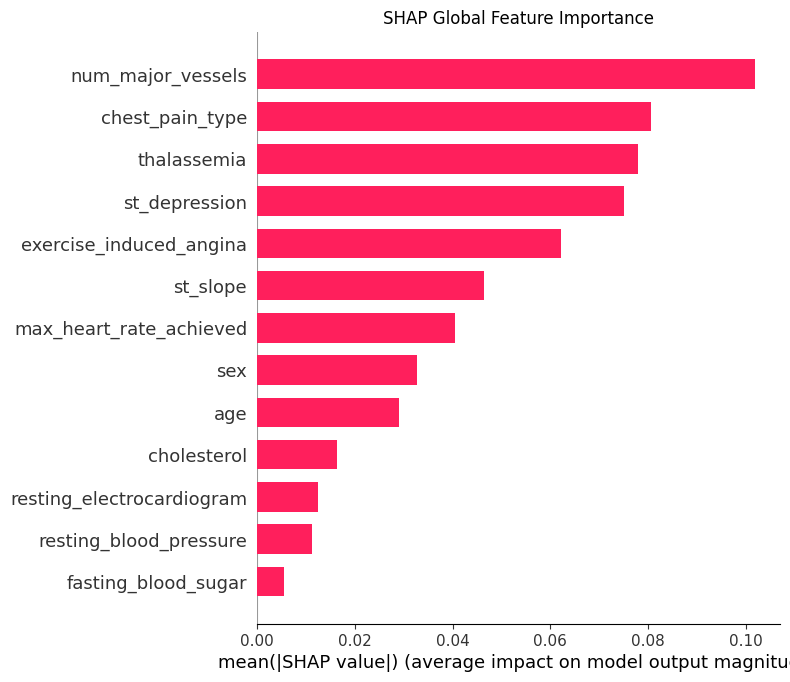

In [21]:
shap.summary_plot(
    shap_values_class1,
    X_test,
    plot_type="bar",
    color='#ff1f5c',
    show=False
)

plt.title("SHAP Global Feature Importance")
plt.show()

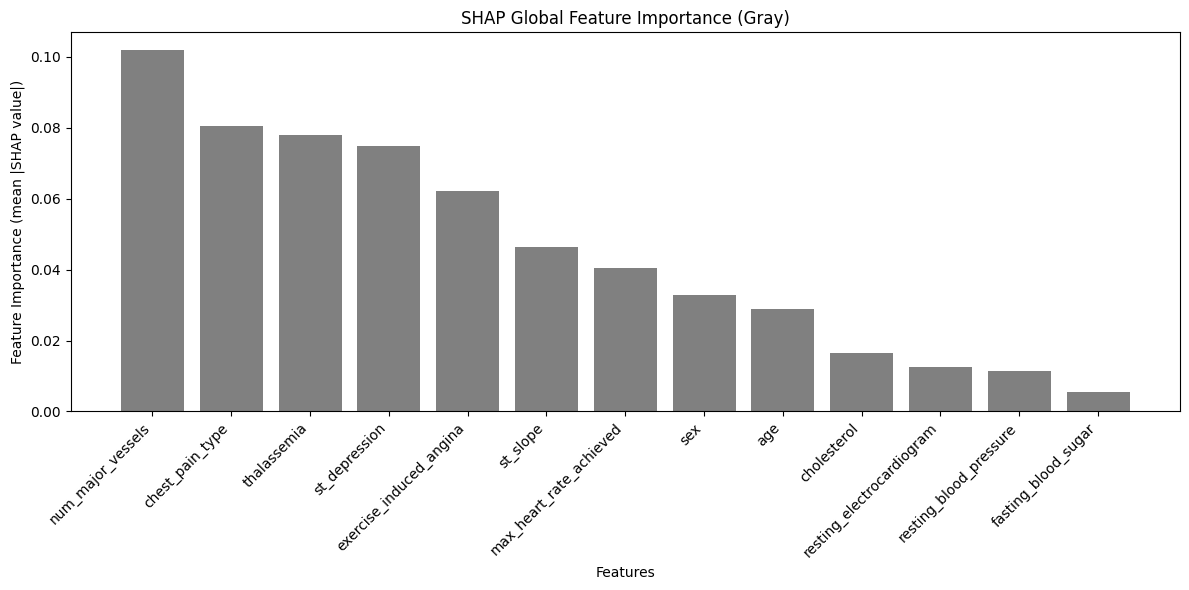

In [22]:


# SHAP 전역 중요도 계산
feature_importance = np.mean(np.abs(shap_values_class1), axis=0)
feature_names = X_test.columns

# 중요도 기준 정렬
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(sorted_features, sorted_importance, color="gray")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Importance (mean |SHAP value|)")
plt.xlabel("Features")
plt.title("SHAP Global Feature Importance (Gray)")
plt.tight_layout()
plt.show()


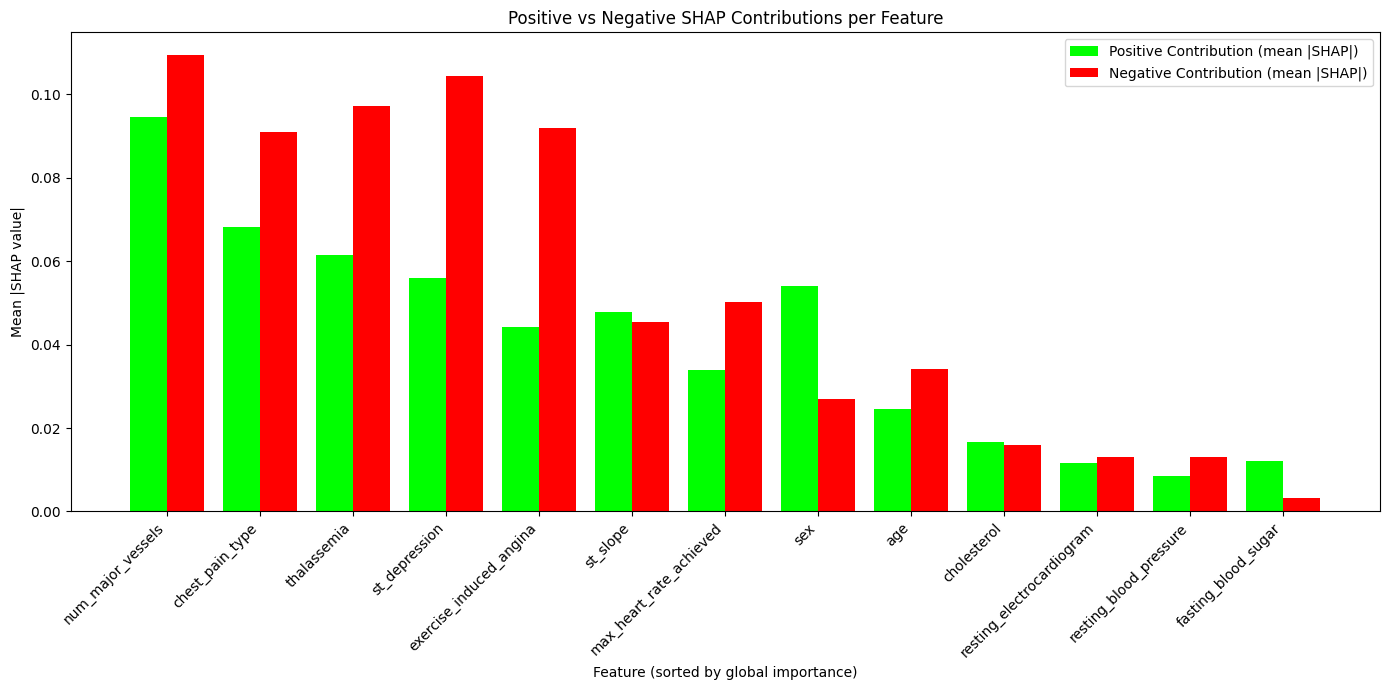

In [23]:
abs_shap = np.abs(shap_values_class1)

# 전체 중요도 (정렬용)
global_importance = abs_shap.mean(axis=0)

# 양의 방향 기여 평균
pos_mean = np.array([
    abs_shap[shap_values_class1[:, i] > 0, i].mean()
    if np.any(shap_values_class1[:, i] > 0) else 0
    for i in range(abs_shap.shape[1])
])

# 음의 방향 기여 평균
neg_mean = np.array([
    abs_shap[shap_values_class1[:, i] < 0, i].mean()
    if np.any(shap_values_class1[:, i] < 0) else 0
    for i in range(abs_shap.shape[1])
])
sorted_idx = np.argsort(global_importance)[::-1]

features_sorted = X_test.columns[sorted_idx]
pos_sorted = pos_mean[sorted_idx]
neg_sorted = neg_mean[sorted_idx]

x = np.arange(len(features_sorted))
bar_width = 0.4

plt.figure(figsize=(14, 7))

# 양의 방향 기여 (초록)
plt.bar(
    x - bar_width/2,
    pos_sorted,
    width=bar_width,
    color='lime',
    label='Positive Contribution (mean |SHAP|)'
)

# 음의 방향 기여 (빨강)
plt.bar(
    x + bar_width/2,
    neg_sorted,
    width=bar_width,
    color='red',
    label='Negative Contribution (mean |SHAP|)'
)

plt.xticks(x, features_sorted, rotation=45, ha='right')
plt.ylabel("Mean |SHAP value|")
plt.xlabel("Feature (sorted by global importance)")
plt.title("Positive vs Negative SHAP Contributions per Feature")

plt.legend()
plt.tight_layout()
plt.show()




--- SHAP Force Plot (Individual Prediction) ---


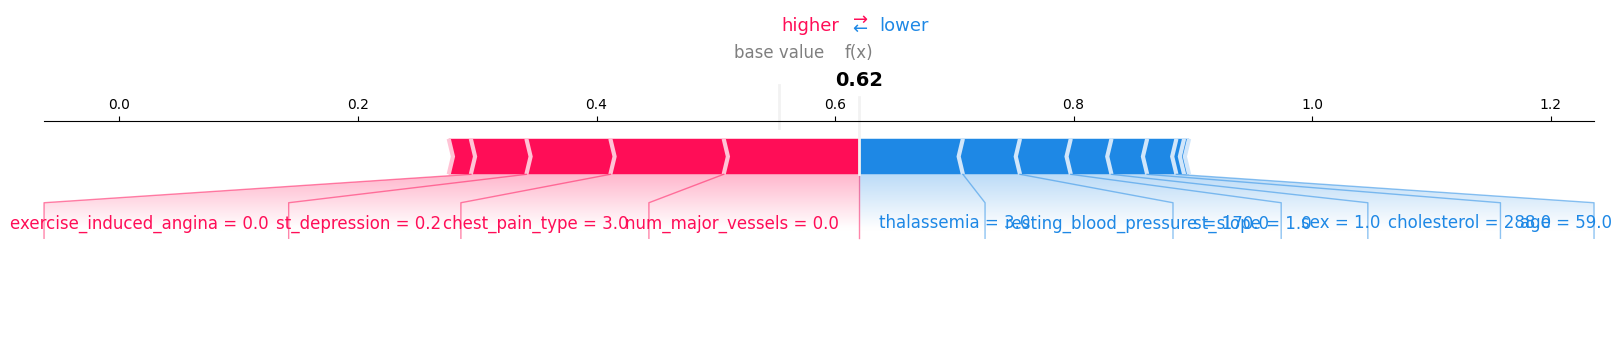

Force Plot이 정적인 PNG 파일로 저장되었습니다: C:/Users/js103/Desktop/SHAP 공부/force_plot_static.png


In [24]:
# Explainer의 expected_value는 보통 [class0_base_value, class1_base_value] 형태
expected_value_class1 = explainer.expected_value[1] 

instance_index = 1 # 해석하고 싶은 첫 번째 환자 인덱스
instance_to_explain = X_test.iloc[instance_index]

print("\n--- SHAP Force Plot (Individual Prediction) ---")

# Force Plot 생성
shap.force_plot(expected_value_class1, 
                shap_values_class1[instance_index], 
                instance_to_explain,
                matplotlib=True,) 
# 참고: 이 Plot은 Jupyter Notebook 또는 Colab 환경에서 대화형으로 표시됩니다.

save_file_path = "C:/Users/js103/Desktop/SHAP 공부/force_plot_static.png"
plt.savefig((save_file_path), bbox_inches='tight', dpi=300)
plt.close() # 플롯 닫기

print(f"Force Plot이 정적인 PNG 파일로 저장되었습니다: {save_file_path}")


--- SHAP Waterfall Plot (개별 예측) ---


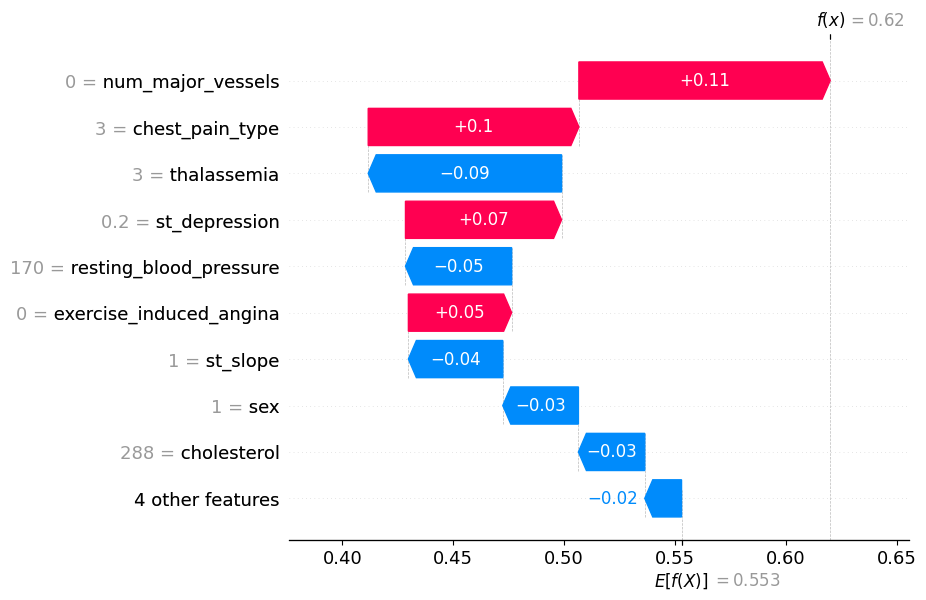

In [25]:
# 해석할 특정 인스턴스 선택 (예: 테스트 세트의 첫 번째 환자, 인덱스 0)
instance_index = 1

# 단일 샘플의 SHAP 값 및 데이터 준비
single_instance_shap_values = shap_values_class1[instance_index]
single_instance_data = X_test.iloc[instance_index]

# Waterfall Plot을 위해 단일 Explanation 객체 생성
shap_output_for_waterfall = shap.Explanation(
    values=single_instance_shap_values,
    base_values=expected_value_class1,
    data=single_instance_data.values,
    feature_names=X_test.columns.tolist()
)

print("\n--- SHAP Waterfall Plot (개별 예측) ---")

# Waterfall Plot 생성 및 상위 10개 특성만 표시
shap.plots.waterfall(shap_output_for_waterfall, max_display=10)

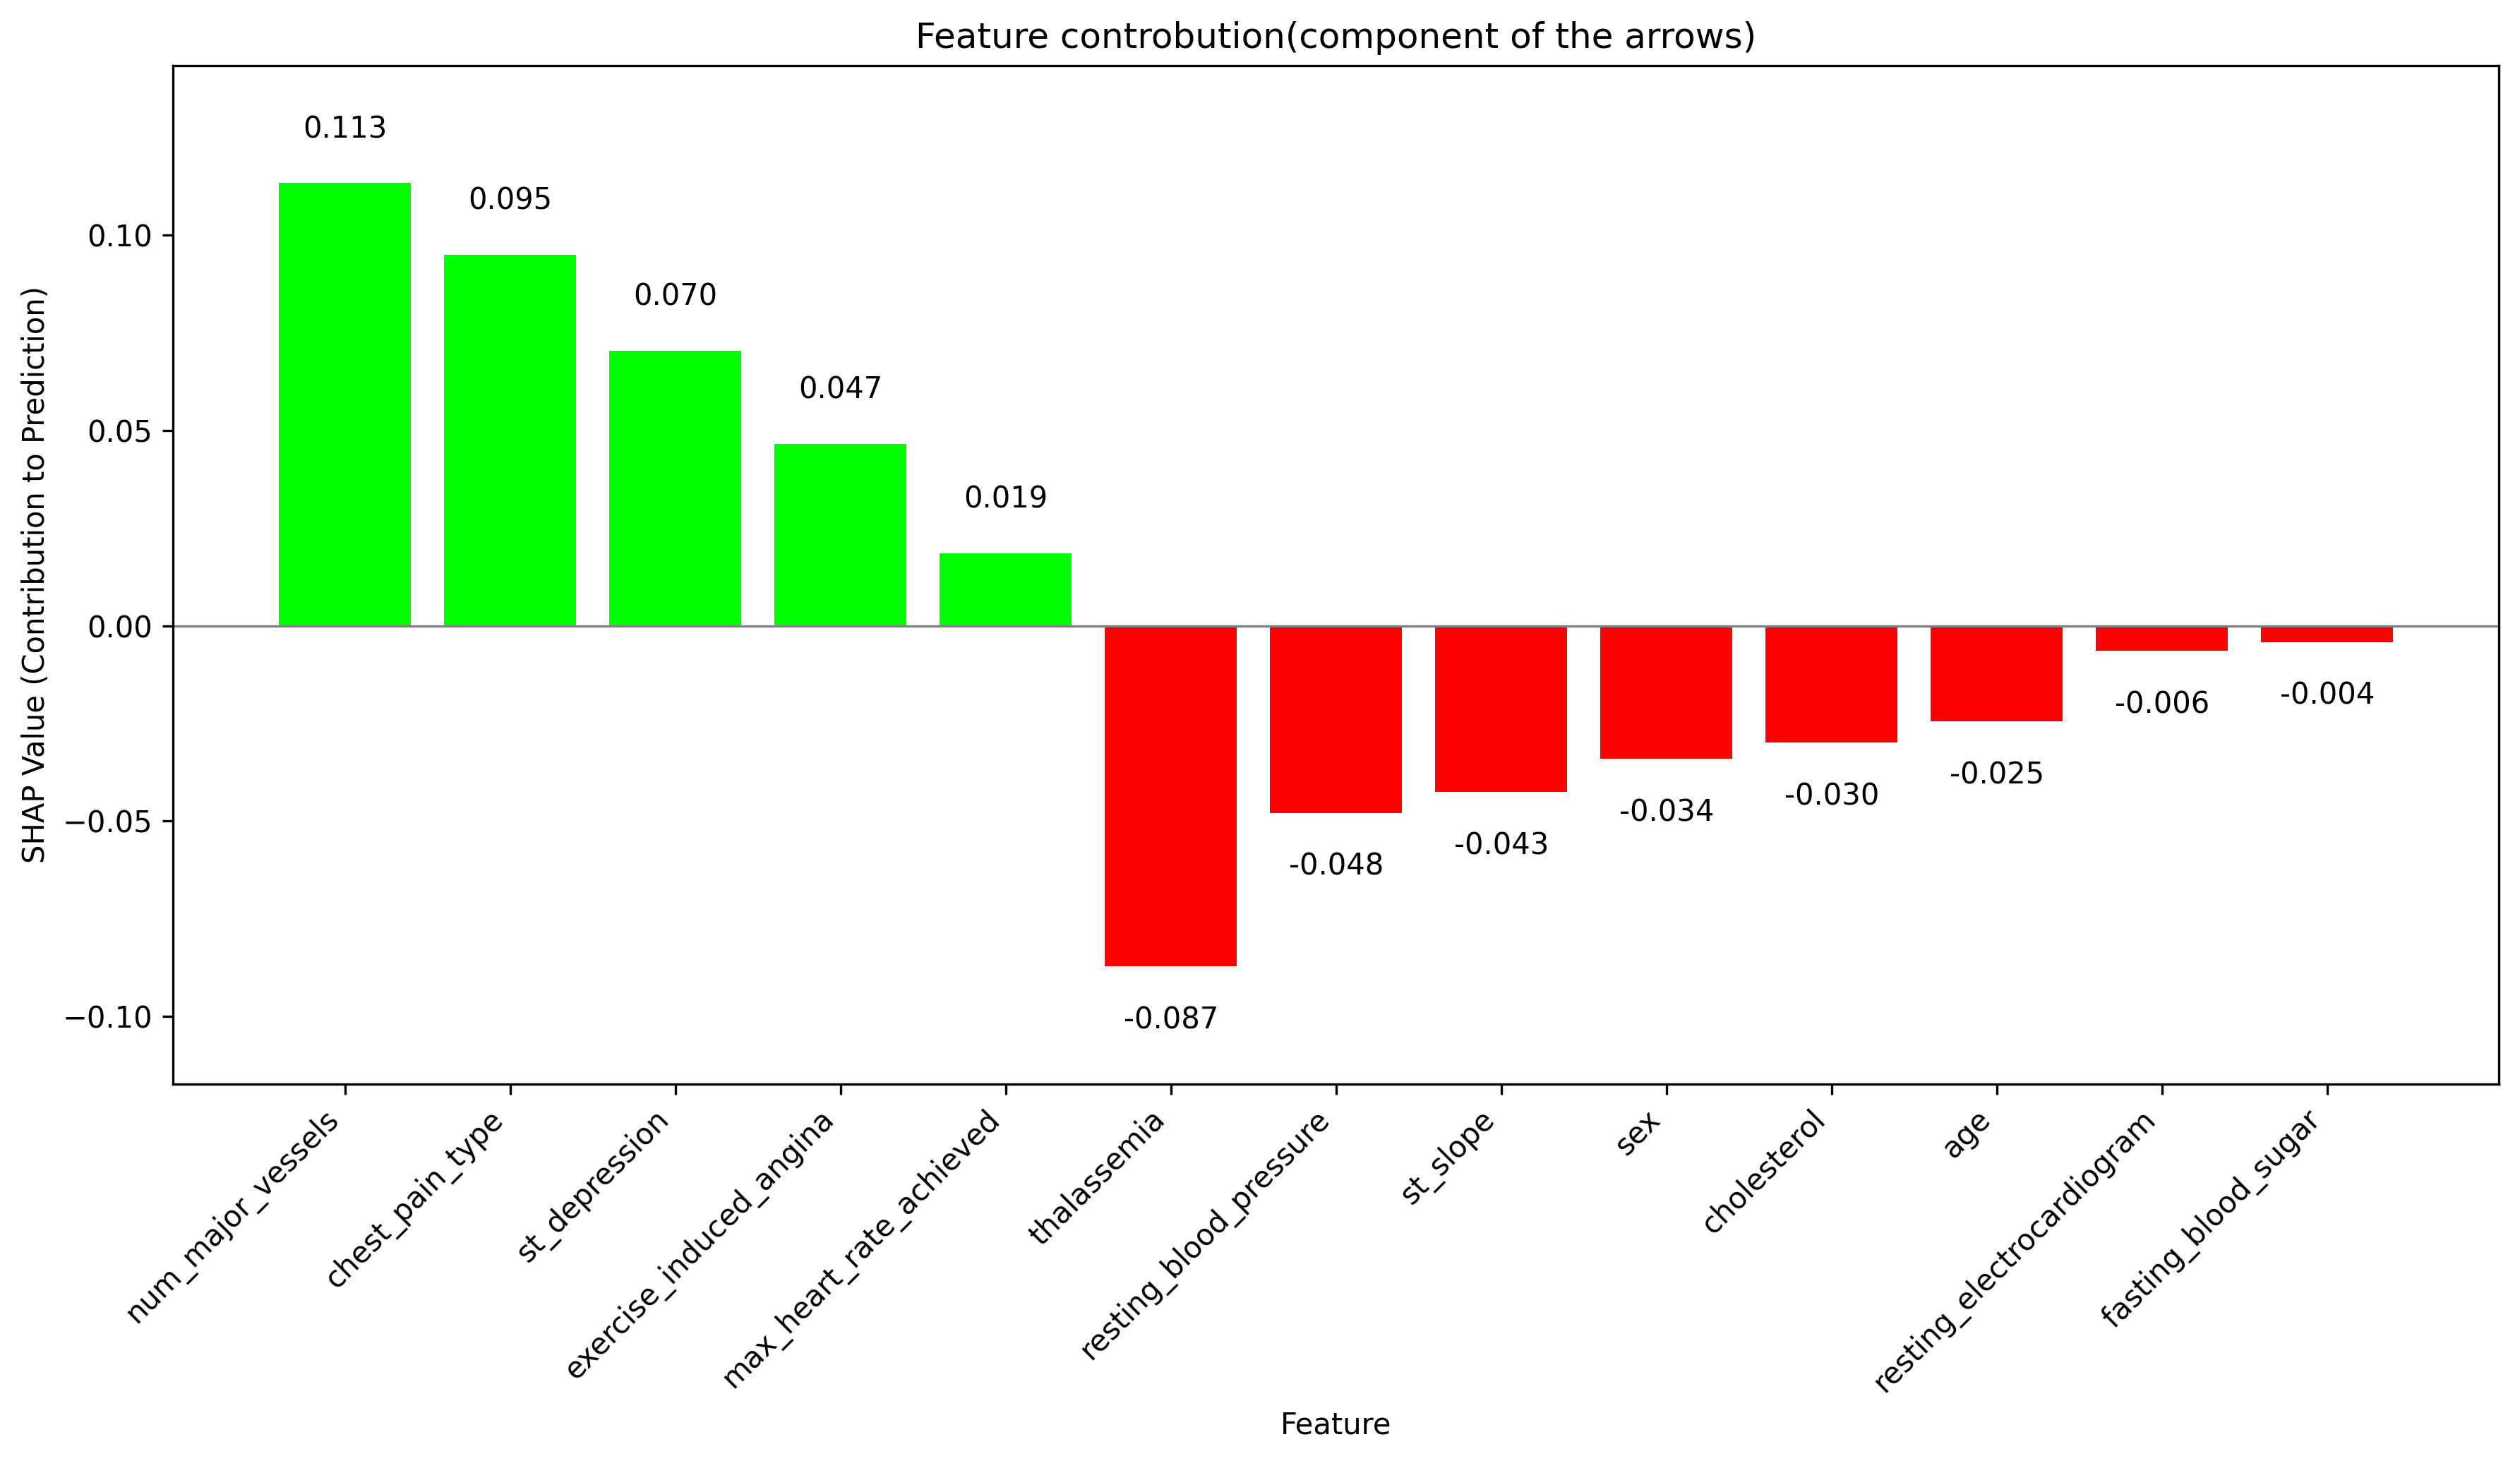

In [26]:
# ---------------------------------------------
# SHAP 값과 X_test가 준비되었다고 가정
# ---------------------------------------------

# 해석할 특정 인스턴스 선택
instance_index = 1

# 단일 샘플의 SHAP 값 추출
single_shap_value = shap_values_class1[instance_index]
feature_names = X_test.columns.tolist()

# ---------------------------------------------
# 정렬 기준 변경: SHAP 값 자체를 기준으로 내림차순 정렬
# ---------------------------------------------
# np.abs()를 제거하여 부호(+/-)를 모두 고려합니다.
sort_indices = np.argsort(single_shap_value)[::-1] 
sorted_shap = single_shap_value[sort_indices]
sorted_features = np.array(feature_names)[sort_indices]

# ---------------------------------------------
# 정렬 기준: 
# ① 양수 SHAP → 절댓값 큰 순서
# ② 음수 SHAP → 절댓값 큰 순서
# ---------------------------------------------

# SHAP 값 분리
pos_idx = np.where(single_shap_value > 0)[0]
neg_idx = np.where(single_shap_value < 0)[0]

# 양수 SHAP 절댓값 기준 정렬
pos_sorted = pos_idx[np.argsort(np.abs(single_shap_value[pos_idx]))[::-1]]

# 음수 SHAP 절댓값 기준 정렬
neg_sorted = neg_idx[np.argsort(np.abs(single_shap_value[neg_idx]))[::-1]]

# 최종 정렬: 양수 → 음수
sort_indices = np.concatenate([pos_sorted, neg_sorted])

# 정렬된 값
sorted_shap = single_shap_value[sort_indices]
sorted_features = np.array(feature_names)[sort_indices]

colors = ['lime' if s > 0 else 'red' for s in sorted_shap]

# 색상 지정 (양수: 빨강, 음수: 파랑)
colors = ['lime' if s > 0 else 'red' for s in sorted_shap]

# Y축 범위 계산 및 확장 (텍스트 삐져나감 방지)
y_min = np.min(sorted_shap)
y_max = np.max(sorted_shap)
padding_factor = 0.15 
padding_upper = (y_max - y_min) * padding_factor
padding_lower = (y_max - y_min) * padding_factor

plt.figure(figsize=(12, 7), dpi=300)
plt.bar(sorted_features, sorted_shap, color=colors)
plt.ylim(y_min - padding_lower, y_max + padding_upper) 

# SHAP 값 텍스트 표시
for i, value in enumerate(sorted_shap):
    text_label = f"{value:.3f}"
    
    # 양수 막대: 막대 위에 표시 (y_pos를 0.01 정도 띄움)
    if value >= 0:
        y_pos = value + 0.01 
        plt.text(i, y_pos, text_label, 
                 ha='center', va='bottom', fontsize=10, color='black')
    
    # 음수 막대: 막대 아래에 표시 (y_pos를 0.01 정도 띄움)
    else:
        y_pos = value - 0.01
        plt.text(i, y_pos, text_label, 
                 ha='center', va='top', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylabel("SHAP Value (Contribution to Prediction)")
plt.xlabel("Feature")
plt.title(f"Feature controbution(component of the arrows)")
plt.tight_layout()
plt.show()

In [27]:
# ---------------------------------------------
# 정렬 기준: 
# ① 양수 SHAP → 절댓값 큰 순서
# ② 음수 SHAP → 절댓값 큰 순서
# ---------------------------------------------

# SHAP 값 분리
pos_idx = np.where(single_shap_value > 0)[0]
neg_idx = np.where(single_shap_value < 0)[0]

# 양수 SHAP 절댓값 기준 정렬
pos_sorted = pos_idx[np.argsort(np.abs(single_shap_value[pos_idx]))[::-1]]

# 음수 SHAP 절댓값 기준 정렬
neg_sorted = neg_idx[np.argsort(np.abs(single_shap_value[neg_idx]))[::-1]]

# 최종 정렬: 양수 → 음수
sort_indices = np.concatenate([pos_sorted, neg_sorted])

# 정렬된 값
sorted_shap = single_shap_value[sort_indices]
sorted_features = np.array(feature_names)[sort_indices]

colors = ['lime' if s > 0 else 'red' for s in sorted_shap]


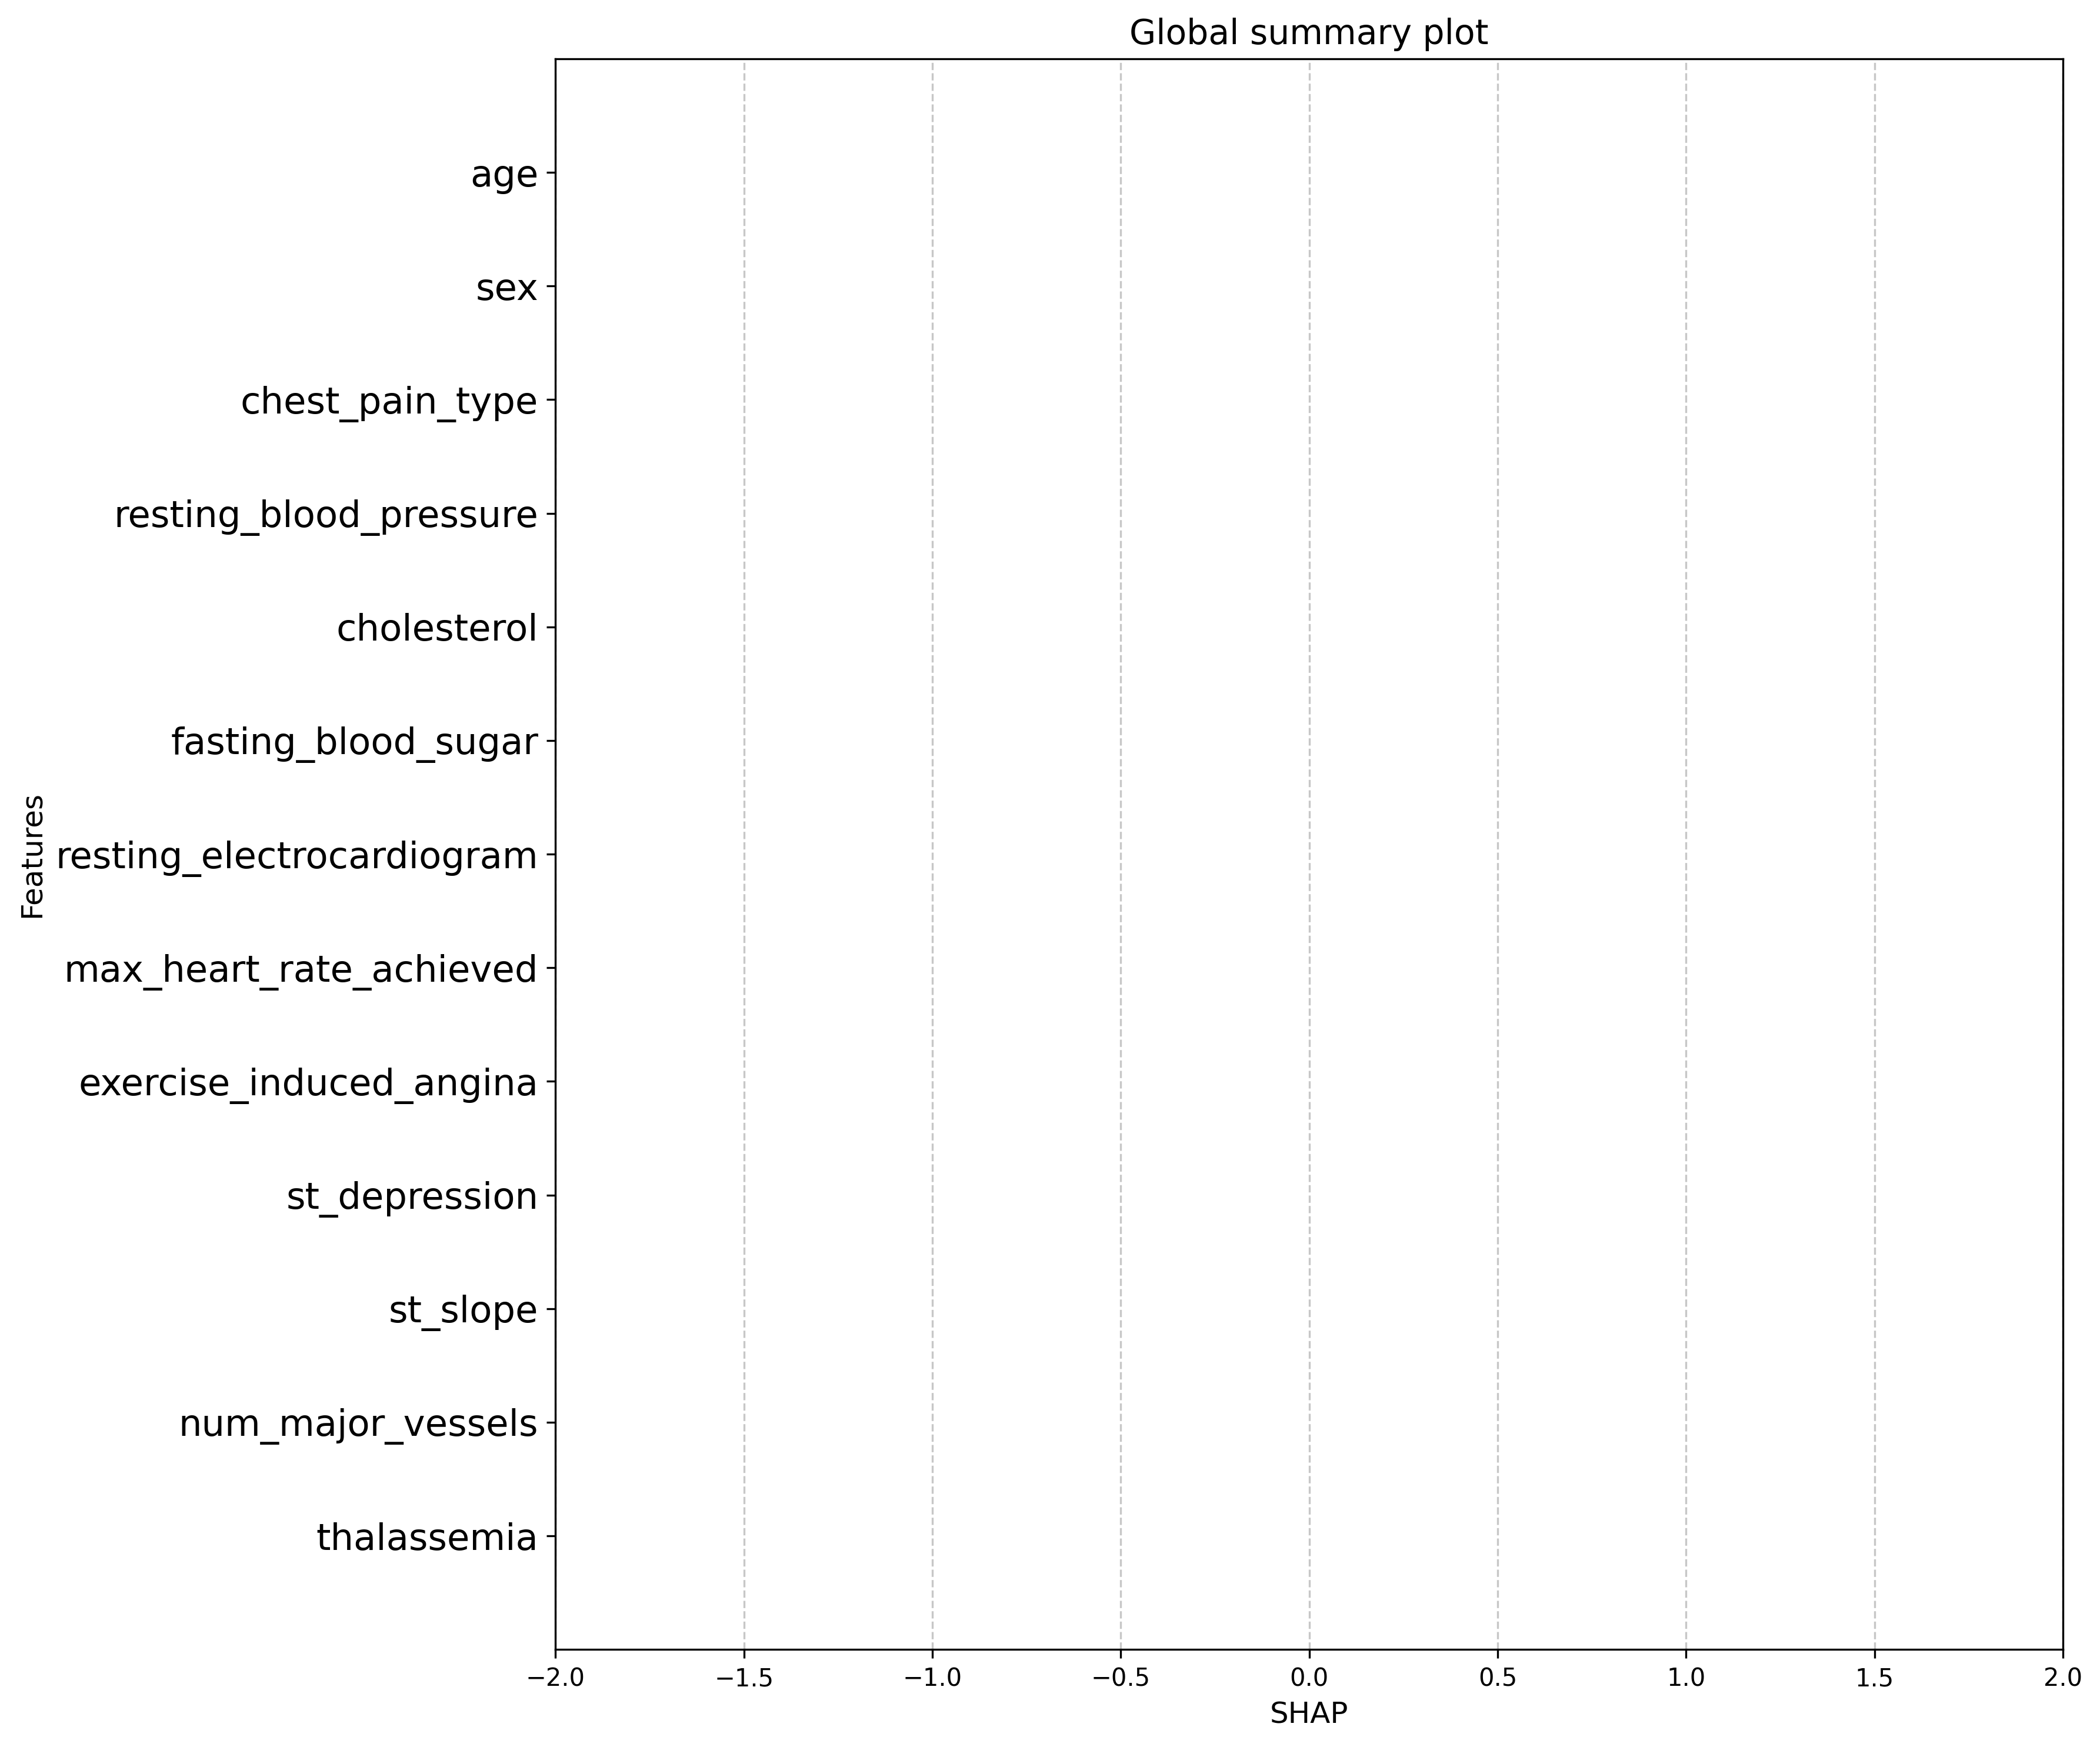

In [28]:
# 1. 특징 이름 정의
feature_names = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
    'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
    'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 
    'st_slope', 'num_major_vessels', 'thalassemia'
]

# 특징 개수
num_features = len(feature_names) 

# 2. Matplotlib figure와 axes 생성 (크기 유지: 12x10)
plt.figure(figsize=(12, 10), dpi = 300) 
ax = plt.gca()
ax.set_title("Global summary plot", fontsize=14)

# 3. y축에 특징 이름 설정 및 순서 조정 (역순 유지)
reversed_feature_names = feature_names[::-1] 

# y축 틱 위치는 0부터 num_features - 1까지입니다.
ax.set_yticks(np.arange(num_features))
ax.set_yticklabels(reversed_feature_names, fontsize=15)
ax.set_ylabel("Features", fontsize=12) 

# ⭐ 핵심 수정: y축의 표시 범위를 조정하여 위아래 여백을 만듭니다.
# 0.5만큼의 패딩을 추가하여 age와 thalassemia가 경계에서 떨어지도록 합니다.
ax.set_ylim([-1, num_features - 1 + 1]) 

# 4. x축 범위 설정
ax.set_xlim([-2, 2])
ax.set_xlabel("SHAP", fontsize=12)

# 5. 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 6. 그래프 표시
plt.tight_layout()
plt.show()

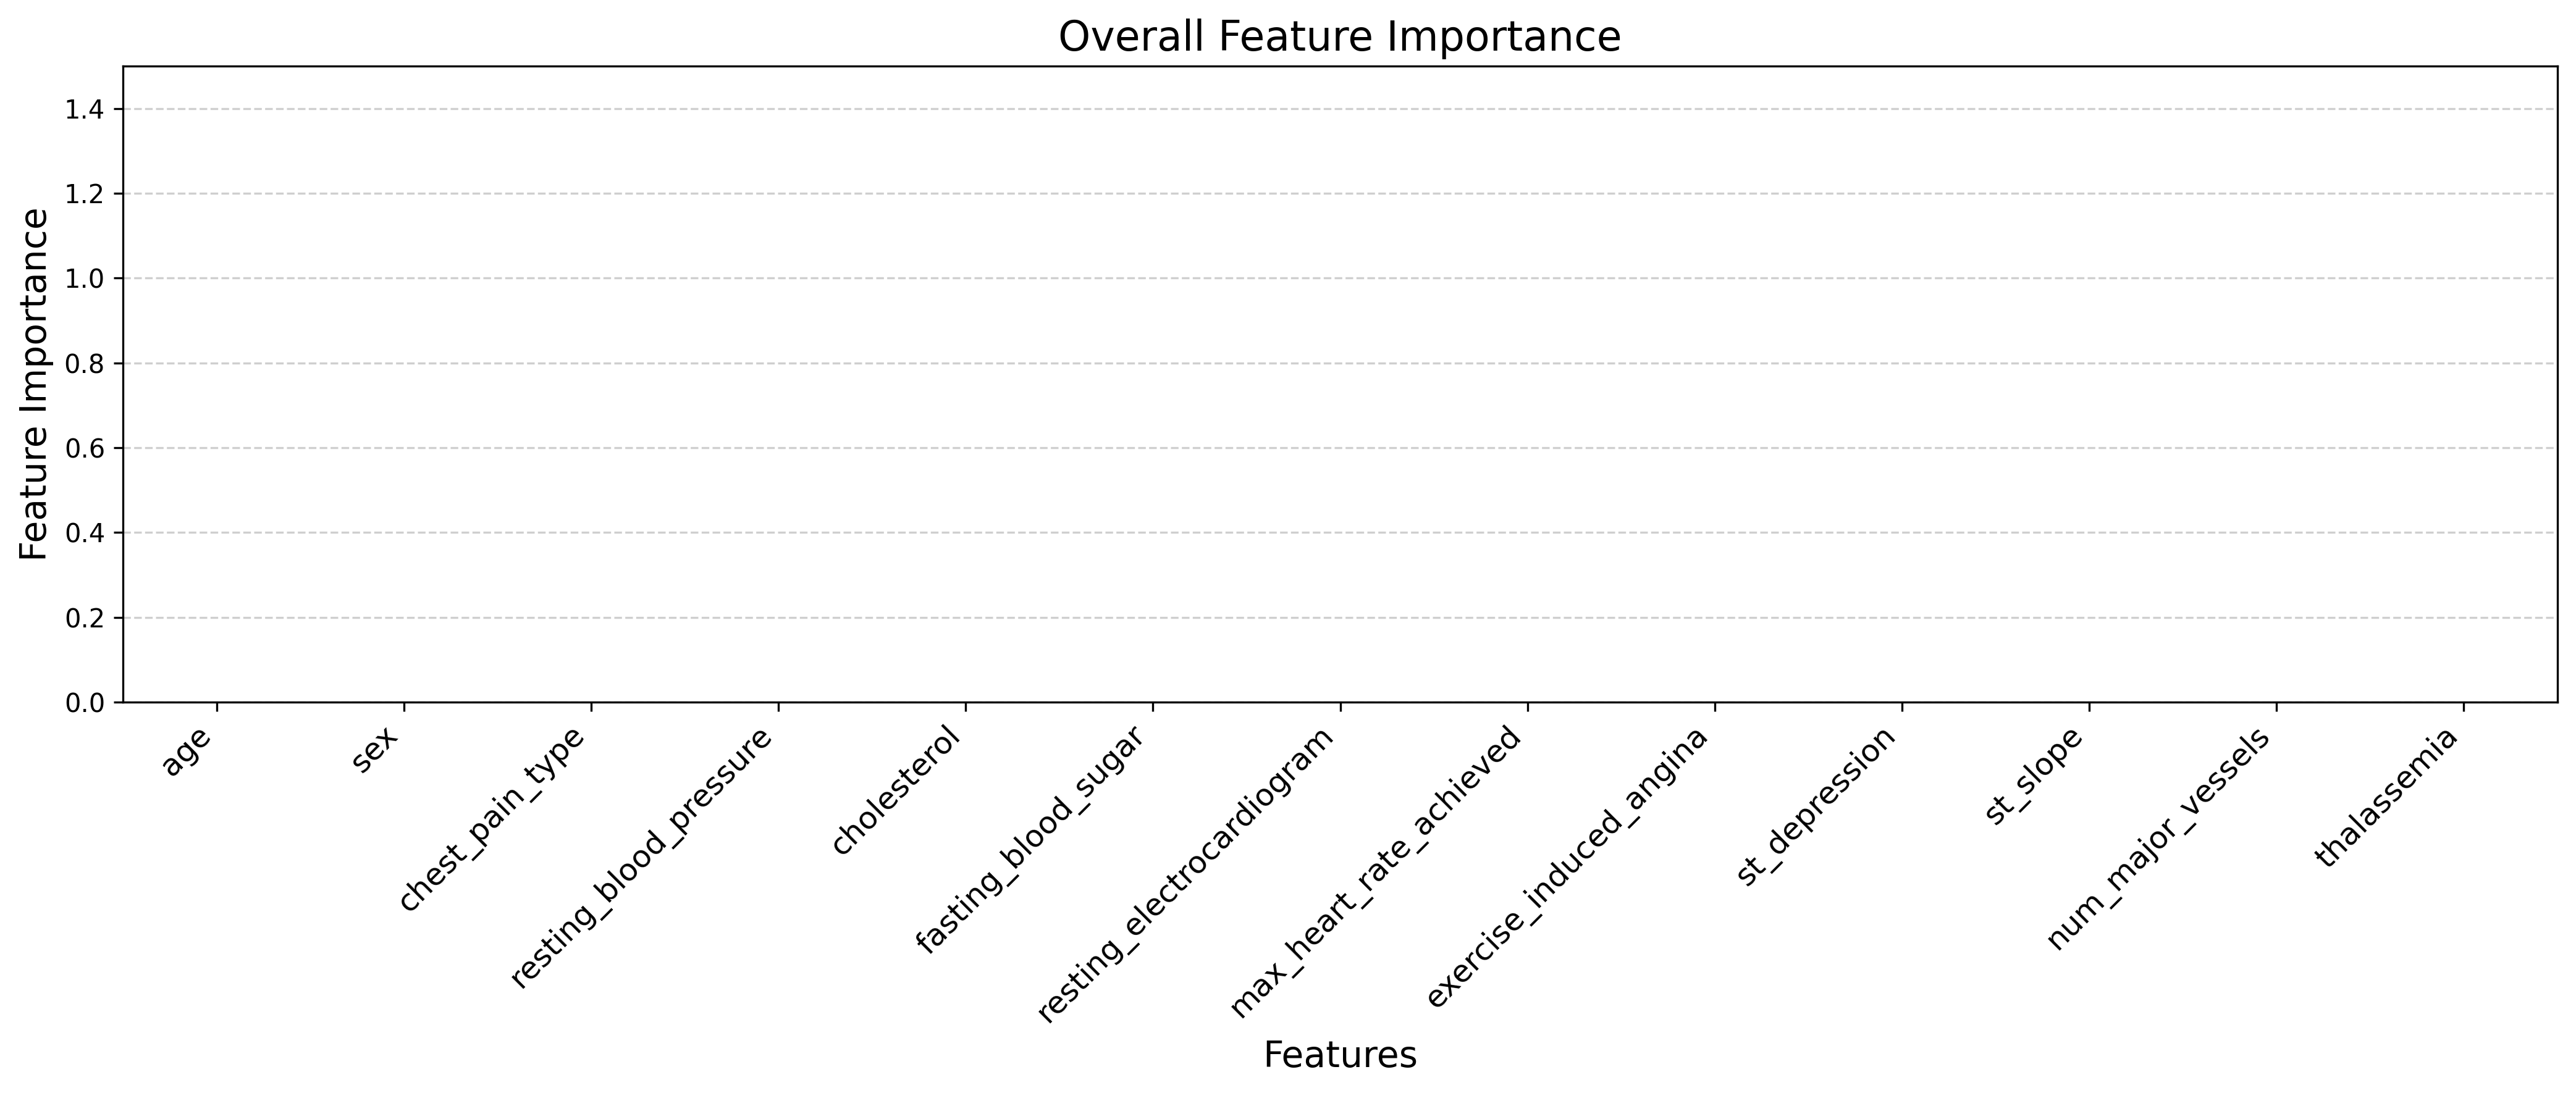

In [29]:
# 1. 특징 이름 정의
feature_names = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
    'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
    'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 
    'st_slope', 'num_major_vessels', 'thalassemia'
]

num_features = len(feature_names)

plt.figure(figsize=(14, 6), dpi=300)
ax = plt.gca()
ax.set_title("Overall Feature Importance", fontsize=16)

# 3. x축 → feature 이름
ax.set_xticks(np.arange(num_features))
ax.set_xticklabels(feature_names, rotation=45, ha='right', fontsize=12)
ax.set_xlabel("Features", fontsize=14)

# ⭐ x축 범위에 여백 추가 → 첫 번째/마지막 feature 잘림 방지
ax.set_xlim([-0.5, num_features - 0.5])

# 4. y축 → 0~4로 변경
ax.set_ylabel("Feature Importance", fontsize=14)
ax.set_ylim([0, 1.5])

# 5. 그리드
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
